In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
corr = df.corr()

In [10]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


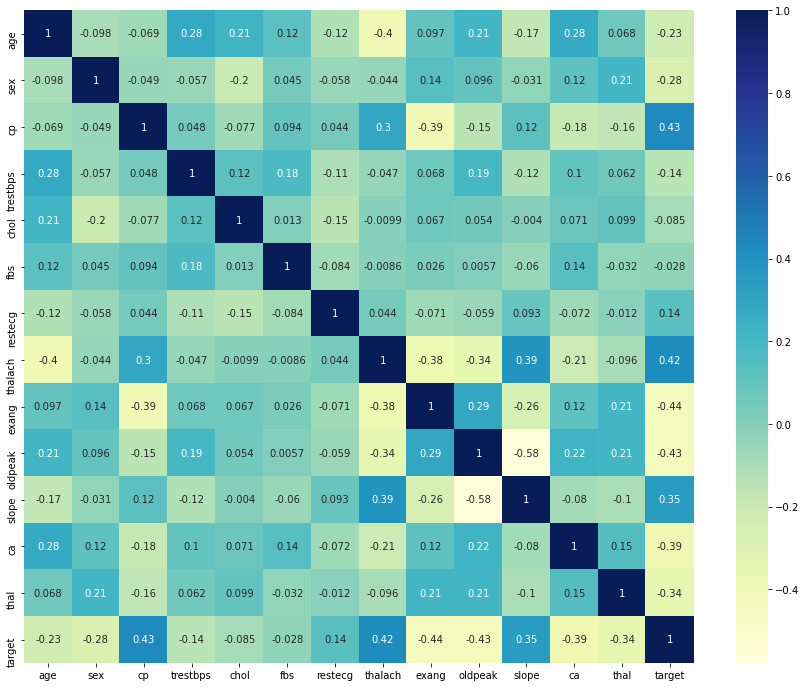

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

In [12]:
print(corr["target"].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


In [13]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Modeling

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [15]:
print("Skewness: %f" % df['trestbps'].skew())
print("Skewness: %f" % df['thalach'].skew())
print("Skewness: %f" % df['oldpeak'].skew())
print("Skewness: %f" % df['chol'].skew())
print("Skewness: %f" % df['age'].skew())

Skewness: 0.713768
Skewness: -0.537410
Skewness: 1.269720
Skewness: 1.143401
Skewness: -0.202463


In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

## Model 1: Logistic Regression

In [19]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) 
model1.fit(x_train, y_train) 

y_pred1 = model1.predict(x_test) 
print(classification_report(y_test, y_pred1)) 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [20]:
print(accuracy_score(y_test, y_pred1)) 

0.8524590163934426


## Model 2.0: K-NN (default)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() 
model2.fit(x_train, y_train) 

y_pred2 = model2.predict(x_test) 
print(classification_report(y_test, y_pred2)) 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [22]:
print(accuracy_score(y_test, y_pred2)) 

0.9016393442622951


## Model 2.1: K-NN (n_estimators = 9)

The optimal number of neighbors is 9


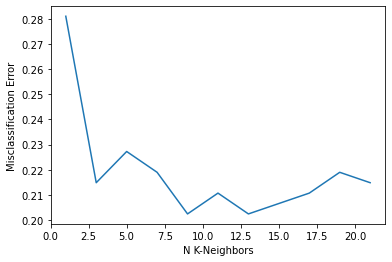

In [25]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
neighbors = list(range(1, 23, 2))

# empty list that will hold cv scores
knn_cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=2, scoring='accuracy')
    knn_cv_scores.append(scores.mean())
    
mse = [1 - x for x in knn_cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel('N K-Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model22 = KNeighborsClassifier(n_neighbors=9)
model22.fit(x_train, y_train) 

y_pred22 = model21.predict(x_test) 
print(classification_report(y_test, y_pred22)) 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [27]:
print(accuracy_score(y_test, y_pred22))

0.9180327868852459


## Model 3: SVM 

In [28]:
from sklearn.svm import SVC

model3 = SVC(random_state=1) 
model3.fit(x_train, y_train) 

y_pred3 = model3.predict(x_test) 
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [29]:
print(accuracy_score(y_test, y_pred3)) 

0.8688524590163934


## Model 4: Random Forest


In [30]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(random_state=1)
model4.fit(x_train, y_train) 

y_pred4 = model4.predict(x_test)
print(classification_report(y_test, y_pred4)) 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [31]:
print(accuracy_score(y_test, y_pred4)) 

0.8360655737704918


In [32]:
fx = df.drop('target',axis=1)

<AxesSubplot:>

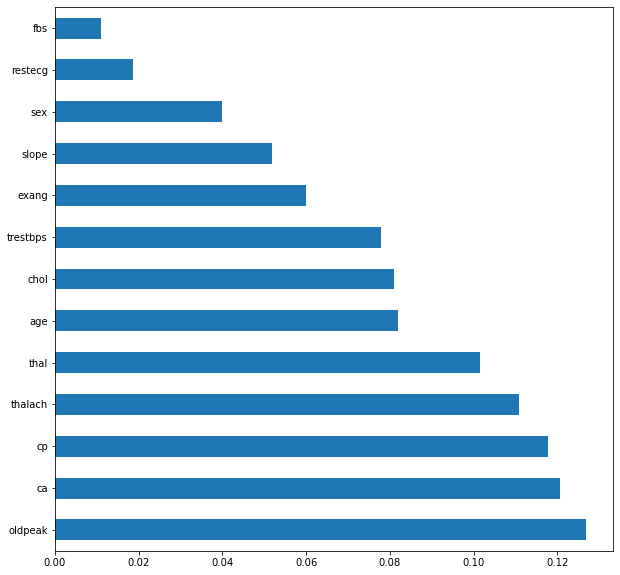

In [33]:
importance = model4.feature_importances_
feat_importances = pd.Series(importance, index=fx.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## Model 5: Artificial Neural Networks

In [34]:
import tensorflow as tf

In [35]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Dense(12,activation='relu',input_dim=13))
model5.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model5.fit(x_train,y_train,epochs=300)

===================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.9044
Epoch 102/300
8/8 [==============================] - 0s 855us/step - loss: 0.2957 - accuracy: 0.8779
Epoch 103/300
8/8 [==============================] - 0s 997us/step - loss: 0.2749 - accuracy: 0.9007
Epoch 104/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.9136
Epoch 105/300
8/8 [==============================] - 0s 997us/step - loss: 0.2577 - accuracy: 0.9045
Epoch 106/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8907
Epoch 107/300
8/8 [==============================] - 0s 2ms/step - loss: 0.2582 - accuracy: 0.9072
Epoch 108/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2568 - accuracy: 0.9030
Epoch 109/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2304 - accuracy: 0.9269
Epoch 110/300
8/8 [==============================] - 0s 1ms/step - loss: 0.2597 - accuracy: 0.9022
Epoch 111/300
8/8 [===============

In [37]:
y_pred5 = model5.predict(x_test)

In [38]:
print(accuracy_score(y_test, y_pred5.round())) 

0.8360655737704918


## Saving the models

In [39]:
import joblib

In [41]:
joblib.dump(model1, 'logistic.pkl')

['logistic.pkl']

In [42]:
joblib.dump(model22, 'knn2.pkl')

['knn2.pkl']

In [43]:
joblib.dump(model2, 'knn1.pkl')

['knn1.pkl']

In [44]:
joblib.dump(model3, 'svm.pkl')

['svm.pkl']

In [45]:
joblib.dump(model4, 'randomforest.pkl')

['randomforest.pkl']